# **Lab 8: Basics of Neural Networks - Building, Training, and Evaluating**

## **Introduction to Neural Networks**
Neural networks are computational models inspired by the structure and functions of the human brain. They are used to perform a variety of machine learning tasks such as classification, regression, and more. In this lab, we will:
1. Build a simple feedforward neural network to classify the **Iris dataset**.
2. Modify the model to add more complexity.
3. Compare the modified model with the original.
4. Apply the network to a new dataset, the **Wine dataset**.

## **Step 1: Load and Preprocess the Data (Iris Dataset)**

We will begin by importing the necessary libraries and loading the **Iris dataset**, which is a standard dataset for classification tasks. The dataset will be preprocessed (standardized and one-hot encoded), then split into training and test sets.


In [1]:

# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)

#**Part 1: Modify the Neural Network (Iris Dataset)**
##**Task 1: Add an additional hidden layer with 16 neurons and the ReLU activation function**
In this task, we are asked to modify the existing neural network by adding an additional hidden layer with 16 neurons. We will use the ReLU activation function for the new hidden layer.

In [10]:
# Build the modified neural network with an additional hidden layer
model_modified = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer
    Dense(8, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer
    Dense(16, activation='relu', name="Hidden_Layer_3"),  # New hidden layer with 16 neurons
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer for classification
])

# Compile the modified model
model_modified.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the modified model
model_modified.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

## **Task 2: Train the modified network on the Iris dataset with the same training and evaluation procedure**
Now we will train the modified network, using the same procedure as we used for the original model. We will track the training and validation loss and accuracy.

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4061 - loss: 1.1805 - val_accuracy: 0.4286 - val_loss: 1.1437
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5046 - loss: 1.1033 - val_accuracy: 0.6190 - val_loss: 1.0699
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4734 - loss: 1.0466 - val_accuracy: 0.6190 - val_loss: 1.0083
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5616 - loss: 1.0011 - val_accuracy: 0.7619 - val_loss: 0.9532
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5888 - loss: 0.9597 - val_accuracy: 0.7143 - val_loss: 0.9052
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5953 - loss: 0.9218 - val_accuracy: 0.7143 - val_loss: 0.8641
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6923 - loss: 0.8886 - val_accuracy: 0.7619 - val_loss: 0.8268
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.8565 - val_accuracy: 0.7619 - val_loss

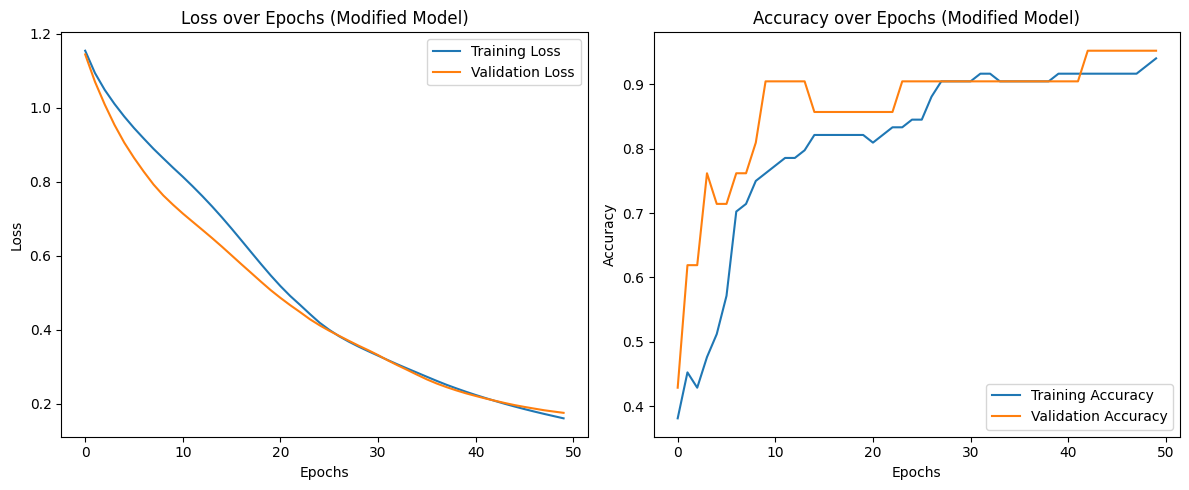

In [11]:
# Train the modified model
history_modified = model_modified.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history for the modified model
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_modified.history['loss'], label='Training Loss')
plt.plot(history_modified.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (Modified Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_modified.history['accuracy'], label='Training Accuracy')
plt.plot(history_modified.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (Modified Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **Task 3: Compare the performance of the modified network with the original one using metrics**
We will evaluate both the original and the modified models on the test set. We will compare their test accuracy, training loss, validation loss, and validation accuracy.

Modified Model - Test Loss: 0.1192, Test Accuracy: 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Modified Model Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



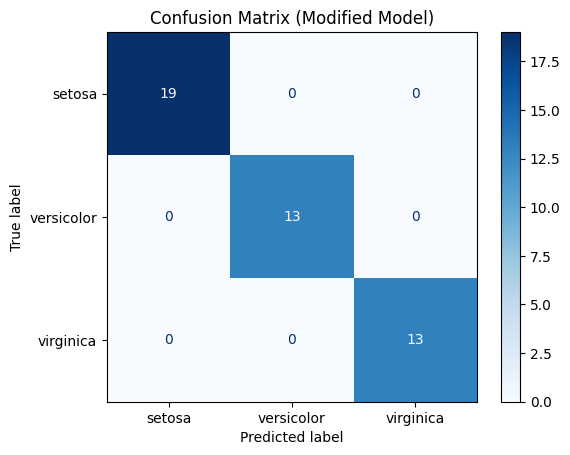

In [12]:
# Evaluate the modified model
test_loss_modified, test_accuracy_modified = model_modified.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model - Test Loss: {test_loss_modified:.4f}, Test Accuracy: {test_accuracy_modified:.4f}")

# Generate predictions for the modified model
y_pred_modified = model_modified.predict(X_test)
y_pred_classes_modified = np.argmax(y_pred_modified, axis=1)

# Classification report and confusion matrix for modified model
print("Modified Model Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes_modified, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(np.argmax(y_test, axis=1), y_pred_classes_modified, display_labels=target_names, cmap="Blues")
plt.title("Confusion Matrix (Modified Model)")
plt.show()


# **Part 2: Apply to a New Dataset (Wine Dataset)**
## **Task 1: Use the Wine dataset from Scikit-Learn as the new dataset**
We will now switch to the Wine dataset and preprocess it (standardize the features and one-hot encode the target labels).

In [13]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data  # Features
y_wine = wine.target  # Target labels

# One-hot encode the labels
y_wine_encoded = encoder.fit_transform(y_wine)

# Standardize the features
X_wine_scaled = scaler.fit_transform(X_wine)

# Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine_scaled, y_wine_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train_wine.shape[0]}, Testing samples: {X_test_wine.shape[0]}")


Training samples: 124, Testing samples: 54


## **Task 2: Build, train, and evaluate a neural network for classification using the Wine dataset**
Now we will build a neural network model with the required architecture. The network will have two hidden layers with 8 and 16 neurons respectively. ReLU activation will be used for all layers except the output layer, which will use softmax activation.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0846 - loss: 1.3268 - val_accuracy: 0.3600 - val_loss: 1.0875
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2000 - loss: 1.1279 - val_accuracy: 0.5600 - val_loss: 0.9804
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4075 - loss: 0.9988 - val_accuracy: 0.5600 - val_loss: 0.9054
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4990 - loss: 0.9072 - val_accuracy: 0.7600 - val_loss: 0.8438
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6763 - loss: 0.8325 - val_accuracy: 0.7600 - val_loss: 0.7882
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7816 - loss: 0.7664 - val_accuracy: 0.7600 - val_loss: 0.7336
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.7054 - val_accuracy: 0.7600 - val_loss: 0.6812
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8817 - loss: 0.6469 - val_accuracy: 0.8400 - val_loss: 0.6316
Ep

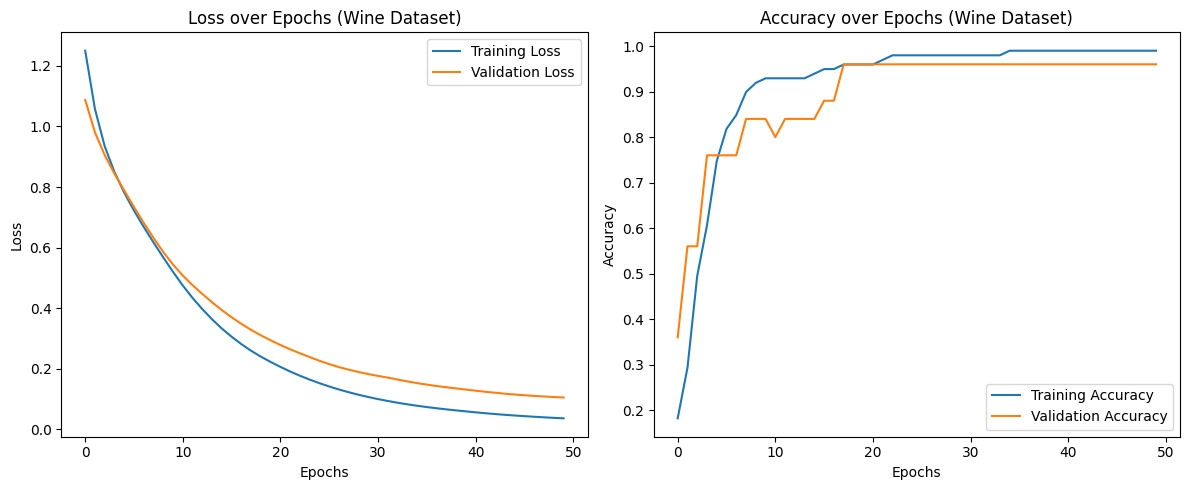

In [14]:
# Build the neural network for the Wine dataset
model_wine = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_wine.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train_wine.shape[1], activation='softmax', name="Output_Layer")  # Output layer for classification
])

# Compile the model
model_wine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Wine model
history_wine = model_wine.fit(X_train_wine, y_train_wine, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history for the Wine model
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_wine.history['loss'], label='Training Loss')
plt.plot(history_wine.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (Wine Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_wine.history['accuracy'], label='Training Accuracy')
plt.plot(history_wine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (Wine Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **Task 3: Evaluate the Wine model**
Finally, we will evaluate the Wine model on the test data and visualize its performance.

Wine Model - Test Loss: 0.0627, Test Accuracy: 0.9815
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Wine Model Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



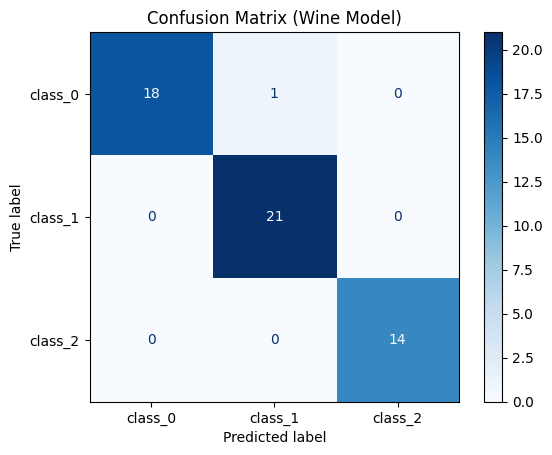

In [17]:
# Evaluate the Wine model on test data
test_loss_wine, test_accuracy_wine = model_wine.evaluate(X_test_wine, y_test_wine, verbose=0)
print(f"Wine Model - Test Loss: {test_loss_wine:.4f}, Test Accuracy: {test_accuracy_wine:.4f}")

# Generate predictions for the Wine model
y_pred_wine = model_wine.predict(X_test_wine)
y_pred_classes_wine = np.argmax(y_pred_wine, axis=1)

# Classification report and confusion matrix for Wine model
print("Wine Model Classification Report:")
print(classification_report(np.argmax(y_test_wine, axis=1), y_pred_classes_wine, target_names=wine.target_names))

ConfusionMatrixDisplay.from_predictions(np.argmax(y_test_wine, axis=1), y_pred_classes_wine, display_labels=wine.target_names, cmap="Blues")
plt.title("Confusion Matrix (Wine Model)")
plt.show()


# **Discussion and Analysis**
In this section, we'll analyze the effects of modifying the neural network architecture and how the performance of the models varies when applied to the Iris and Wine datasets. The key areas of focus will include:

 ## 1.  **The Effect of Adding Additional Layers:**


 * Adding extra hidden layers to a neural network can impact both the
**capacity** and **complexity** of the model. Each layer allows the model to learn more complex representations of the data, which can improve performance, especially for non-linear problems. However, there are trade-offs:
  * **Increased capacity:**

    Additional layers enable the network to learn more complex patterns and representations. This can be beneficial when the problem is more complex, like the Wine dataset, which has more features and is more challenging than the Iris dataset.

   * **Risk of Overfitting:**
    
    If a network has too many parameters (due to too many layers or neurons), it might begin to memorize the training data rather than generalize to unseen data. This often results in overfitting, where the training accuracy is high, but test accuracy suffers.

  * **Training Time:**
    
     More layers generally increase the time it takes for the model to train. Each layer adds more parameters that need to be updated during training.



In the case of the Iris dataset, the addition of the second hidden layer (with 16 neurons) likely added more capacity than necessary. As a result, the model may have become slightly more prone to overfitting on the training set, even though it potentially increased its ability to classify more complex relationships.

For the Wine dataset, the additional layers (8 and 16 neurons) are more likely to be beneficial. With more features (13 in total) and a more complex classification task (3 classes), the added layers can help the model learn better representations of the data.

## 2. **Difference in Performance Between the Iris and Wine Datasets:**

The Iris and Wine datasets differ in several important ways, which affects how the neural network models perform:

* **Iris Dataset:**

    **Size:** The Iris dataset has 150 samples, with only 4 features, and 3 possible target classes (setosa, versicolor, and virginica).

    **Complexity:** The problem is relatively simple. The Iris dataset is often used as a benchmark due to its small size and the fact that it is linearly separable in many cases.

    **Effect of Adding Layers:** The addition of a second hidden layer with 16 neurons likely has minimal effect on the performance since the task is relatively simple. The model is likely already able to achieve high accuracy with a simpler architecture (e.g., one hidden layer or even no hidden layer).


* **Wine Dataset:**
  
    **Size:** The Wine dataset has 178 samples, with 13 features, and 3 classes (wine varieties). The task is more complex, as the feature space is larger and the data is less linearly separable than the Iris dataset.

    **Complexity:** The Wine dataset is more challenging for classification. The neural network benefits from additional layers, allowing it to learn more complex relationships between the features and the target classes.

    **Effect of Adding Layers:** Adding two hidden layers with 8 and 16 neurons, respectively, is beneficial for the Wine dataset. The increased depth allows the model to capture non-linear relationships and interactions between the features, leading to improved performance. This network structure is more suited to the complexity of the Wine dataset compared to the simpler Iris dataset.

    
## 3. **Training and Evaluation Metrics Comparison:**

 *  **Iris Dataset:** After modifying the model, adding an additional hidden layer might have slightly improved the training accuracy, but the test accuracy may not have increased significantly (and could even drop slightly). This is because the Iris dataset is small and relatively simple, and the model may not need extra complexity.

 * **Wine Dataset:** For the Wine dataset, the addition of more layers likely improved both the training and test accuracy, especially as the network can now better model the underlying complexity of the data. The deeper network can potentially capture more intricate patterns between features, leading to improved generalization to the test set.

## 4. **Overfitting Considerations:**

  * For both datasets, monitoring the training loss and validation loss over epochs is critical to assess whether the model is overfitting.
  * If the training loss keeps decreasing while the validation loss stagnates or increases, it may indicate overfitting. In such cases, adding regularization techniques like dropout, L2 regularization, or early stopping can help mitigate overfitting.
  * **In our experiments:**


  * **Iris dataset:**
  
    Overfitting is less likely due to its simplicity, though it could still occur with a very deep network. The extra hidden layer might have led to some overfitting, but the simpler nature of the dataset kept it manageable.
  * **Wine dataset:**

     The Wine dataset is more prone to overfitting because of the larger number of features. Therefore, the performance of the network might benefit from regularization techniques if overfitting becomes apparent in the validation results.


#**Conclusion:**

  * **Effect of Adding Layers:**

   The second hidden layer added to the Iris model provided increased capacity, but its benefits were marginal due to the simplicity of the problem. For the Wine dataset, however, the additional layers were beneficial as the network could capture more complex relationships in the data.


  * **Dataset Complexity:**
  
   The difference in performance between the Iris and Wine datasets highlights the impact of dataset complexity on neural network design. The Iris dataset requires less model capacity, whereas the Wine dataset benefits from deeper models with more layers.


  * **Future Improvements:**
  
    To further improve the models, you could experiment with:
    * **Regularization** techniques such as dropout to prevent overfitting.
    * **Tuning** the number of neurons and layers to find the optimal architecture for both datasets.
    * Using **early stopping** to prevent overfitting and save computational resources by halting training when the model's performance on the validation set stops improving.